/home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
INFO:root:Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0
2025-03-27 21:37:56.097030136 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '70'. It is not used by any node and should be removed from the model.
INFO:root:Onnx model /home/robby/.MyOCR/models/crnn_lite_lstm.onnx loaded to cuda:0
2025-03-27 21:37:56.097040676 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '6'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097042858 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '52'. It is not used by any node and should be 

preds.shape=(23, 8, 5531)
predict cost: 0.07082128524780273 
result:[(text=新闻, confidence=0.0001, bounding_box=(left=18, bottom=67, right=73, top=34))
, (text=地图, confidence=0.0001, bounding_box=(left=253, bottom=67, right=308, top=34))
, (text=贴吧, confidence=0.0001, bounding_box=(left=352, bottom=67, right=409, top=34))
, (text=视频, confidence=0.0001, bounding_box=(left=452, bottom=67, right=509, top=34))
, (text=图片, confidence=0.0001, bounding_box=(left=553, bottom=67, right=608, top=34))
, (text=网盘, confidence=0.0001, bounding_box=(left=653, bottom=67, right=709, top=34))
, (text=文库, confidence=0.0001, bounding_box=(left=752, bottom=67, right=809, top=34))
, (text=hao123, confidence=0.0001, bounding_box=(left=118, bottom=66, right=209, top=35))
]


3m2025-03-27 21:37:56.097058473 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '88'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097059648 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '64'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097061125 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '346'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097062274 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '340'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097063542 [W:onnxruntime:, graph.cc:4401 CleanUnusedInitializersAndNodeArgs] Removing initializer '334'. It is not used by any node and should be removed from the model.
2025-03-27 21:37:56.097064871 [W:onnxruntime:, gra

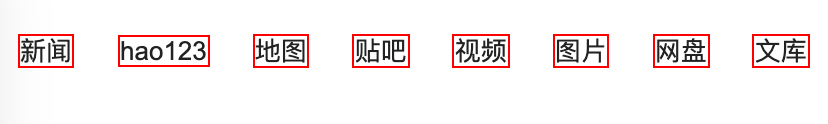

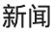

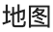

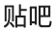

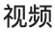

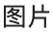

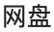

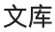

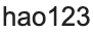

In [1]:
import time
import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.models.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter
from myocr.predictors.text_recognition_predictor import TextRecognitionParamConverter

orig_image = Image.open("images/test_ocr.png").convert("RGB")

dec = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
model = ModelZoo.load_model("onnx", MODEL_PATH+"crnn_lite_lstm.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")

start_time = time.time()
dec_predictor = dec.predictor(TextDetectionParamConverter(dec.device))
detected = dec_predictor.predict(orig_image)

cvt = TextRecognitionParamConverter()
p = model.predictor(cvt)
rec = p.predict(detected)
ent_time = time.time()
print(f"predict cost: {ent_time-start_time} \nresult:{rec}")

draw = ImageDraw.Draw(orig_image)
for box in detected.bounding_boxes: # type: ignore
    draw.polygon(
        [(box.left, box.bottom), (box.left, box.top), (box.right, box.top), (box.right, box.bottom)],
        outline="red",
        width=2,
    )

display(orig_image)

for img in cvt.croped_imgs:
    display(img)
